### Logistic Regression

Problem Statement: Classify using Logistic Regression

Dataset --> GasolineConsumption.csv

Class: Limit = 0 = P, Exceed = 1 = N

In [1]:
#Loading the Required Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the data set
gas = pd.read_csv("C:/Users/Akaash/Downloads/GasolineConsumption.csv")
gas.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,18.9,350.0,165,260,8.00,2.56,4,3,200.3,69.9,3910,1
1,17.0,350.0,170,275,8.50,2.56,4,3,199.6,72.9,3860,1
2,20.0,250.0,105,185,8.25,2.73,1,3,196.7,72.2,3510,1
3,18.3,351.0,143,255,8.00,3.00,2,3,199.9,74.0,3890,1
4,20.1,225.0,95,170,8.40,2.76,1,3,194.1,71.8,3365,0


In [3]:
#Cheching the Shape & NA Value
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       30 non-null     float64
 1   X1      30 non-null     float64
 2   X2      30 non-null     int64  
 3   X3      30 non-null     int64  
 4   X4      30 non-null     float64
 5   X5      30 non-null     float64
 6   X6      30 non-null     int64  
 7   X7      30 non-null     int64  
 8   X8      30 non-null     float64
 9   X9      30 non-null     float64
 10  X10     30 non-null     int64  
 11  X11     30 non-null     int64  
dtypes: float64(6), int64(6)
memory usage: 2.9 KB


Inference: No NA Values Present

#### Building Logistic Regression Model

In [4]:
# Dividing our data into input and output variables 
X = gas.iloc[:,0:11]
Y = gas.iloc[:,11]

In [5]:
# Splitting data into training and testing data set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

Inference: Made a Train-Test Split of 80% - 20%

In [6]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [7]:
#Predict for X dataset
y_pred = classifier.predict(X_test)
pd.DataFrame(y_pred).value_counts() # getting the count of each category 

1    5
0    1
dtype: int64

Inference: These are the class for Y Variable (Y_hat)/(Predicted Values)

In [8]:
#Probability
y_pred_prob = classifier.predict_proba(X_test)
y_pred_prob

array([[4.93167569e-01, 5.06832431e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.79012360e-11, 1.00000000e+00],
       [9.99999998e-01, 2.31313827e-09],
       [2.51483595e-05, 9.99974852e-01],
       [3.32224131e-04, 9.99667776e-01]])

Inference: These are the Probability of Y Variable (Y_hat)/(Predicted Values)

In [9]:
#Creating Dataframe of Actual and Predicted values for Y, (Y,Y_hat)
y_pred_df= pd.DataFrame({'actual': Y_test,'predicted_prob': classifier.predict(X_test)})
y_pred_df

,actual,predicted_prob
2,1,1
16,1,1
19,1,1
14,0,0
15,1,1
13,1,1


Inference: This Give the Actual & Predicted values side by side

In [10]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
print (confusion_matrix)

[[1 0]
 [0 5]]


Inference: The Diagonal value(8,22) are the Correctly Predicted Values i.e TP, TN

In [11]:
#Calculating Accuracy 
#TP+TN / TP + FP + FN + TN
((1+5) / (1+0+0+5))*100

100.0

Inference: The Final Accuracy of the Model is 100

In [12]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



#### ROC Curve

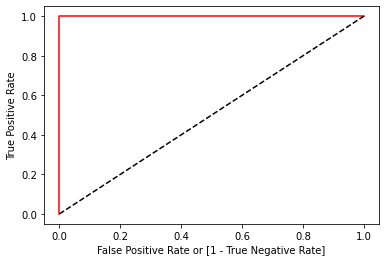

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba (X_test)[:,1])

auc = roc_auc_score(Y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [14]:
#Area Under the Curve
auc

1.0

Inference: The Area Under the Curve For this Problem is 1.0